# ***Data for BTC-USD***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder='../content/drive/MyDrive/Machine Learning/Projects/Crypto/Data/' #<---Kunal

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv(folder + 'BTC-USD.csv', date_parser = True)
data=data.dropna()
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1822,2021-10-02,48137.468750,48282.062500,47465.496094,47711.488281,47711.488281,3.061435e+10
1823,2021-10-03,47680.027344,49130.691406,47157.289063,48199.953125,48199.953125,2.663812e+10
1824,2021-10-04,48208.906250,49456.777344,47045.003906,49112.902344,49112.902344,3.338317e+10
1825,2021-10-05,49174.960938,51839.984375,49072.839844,51514.812500,51514.812500,3.587390e+10
1826,2021-10-06,51434.535156,52474.187500,50543.000000,52453.710938,52453.710938,4.122978e+10


# ***PreProcessing***

In [ ]:
data_training = data[data['Date'] <'2021-07-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-10-06,612.469971,613.818970,611.468994,613.020996,613.020996,5.681210e+07
1,2016-10-07,612.607971,617.911987,611.820984,617.120972,617.120972,6.407140e+07
2,2016-10-08,617.341003,619.848999,617.341003,619.107971,619.107971,4.234590e+07
3,2016-10-09,619.171997,619.197998,616.606995,616.752014,616.752014,3.924340e+07
4,2016-10-10,616.822021,621.317993,616.197021,618.994019,618.994019,6.748110e+07
...,...,...,...,...,...,...,...
1724,2021-06-26,31594.664063,32637.587891,30184.501953,32186.277344,32186.277344,3.858539e+10
1725,2021-06-27,32287.523438,34656.128906,32071.757813,34649.644531,34649.644531,3.551164e+10
1726,2021-06-28,34679.121094,35219.890625,33902.074219,34434.335938,34434.335938,3.389252e+10
1727,2021-06-29,34475.558594,36542.109375,34252.484375,35867.777344,35867.777344,3.790146e+10


In [ ]:
data_test = data[data['Date']> '2021-07-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
1730,2021-07-02,33549.601563,33939.589844,32770.679688,33897.046875,33897.046875,3.872897e+10
1731,2021-07-03,33854.421875,34909.261719,33402.695313,34668.546875,34668.546875,2.438396e+10
1732,2021-07-04,34665.566406,35937.566406,34396.476563,35287.781250,35287.781250,2.492431e+10
1733,2021-07-05,35284.343750,35284.343750,33213.660156,33746.003906,33746.003906,2.672155e+10
1734,2021-07-06,33723.507813,35038.535156,33599.917969,34235.195313,34235.195313,2.650126e+10
...,...,...,...,...,...,...,...
1822,2021-10-02,48137.468750,48282.062500,47465.496094,47711.488281,47711.488281,3.061435e+10
1823,2021-10-03,47680.027344,49130.691406,47157.289063,48199.953125,48199.953125,2.663812e+10
1824,2021-10-04,48208.906250,49456.777344,47045.003906,49112.902344,49112.902344,3.338317e+10
1825,2021-10-05,49174.960938,51839.984375,49072.839844,51514.812500,51514.812500,3.587390e+10


In [ ]:
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,612.469971,613.818970,611.468994,613.020996,56812100.0
1,612.607971,617.911987,611.820984,617.120972,64071400.0
2,617.341003,619.848999,617.341003,619.107971,42345900.0
3,619.171997,619.197998,616.606995,616.752014,39243400.0
4,616.822021,621.317993,616.197021,618.994019,67481104.0


In [ ]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.06561292e-05],
       [2.19356515e-06, 6.37052599e-05, 5.71435568e-06, 6.51923608e-05,
        7.13420854e-05],
       [7.74270003e-05, 9.38536451e-05, 9.53286967e-05, 9.67869740e-05,
        9.43353466e-06],
       ...,
       [5.41503034e-01, 5.38621948e-01, 5.40453873e-01, 5.37781530e-01,
        9.64682241e-02],
       [5.38267327e-01, 5.59201459e-01, 5.46142581e-01, 5.60574208e-01,
        1.07892009e-01],
       [5.61042702e-01, 5.51927423e-01, 5.43442276e-01, 5.47425286e-01,
        9.69427143e-02]])

In [ ]:
X_train = []
Y_train = []

In [ ]:
training_data.shape[0]

1725

In [ ]:
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])

In [ ]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [ ]:
X_train.shape

(1665, 60, 5)

# ***Building LSTM***

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units=1))

In [ ]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 50)            11200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 120)              

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train, Y_train, epochs = 20, batch_size =50)

Epoch 1/20
34/34 [==============================] - 12s 210ms/step - loss: 0.0191
Epoch 2/20
34/34 [==============================] - 7s 210ms/step - loss: 0.0059
Epoch 3/20
34/34 [==============================] - 7s 208ms/step - loss: 0.0043
Epoch 4/20
34/34 [==============================] - 7s 210ms/step - loss: 0.0034
Epoch 5/20
34/34 [==============================] - 7s 210ms/step - loss: 0.0042
Epoch 6/20
34/34 [==============================] - 7s 209ms/step - loss: 0.0042
Epoch 7/20
34/34 [==============================] - 7s 210ms/step - loss: 0.0037
Epoch 8/20
34/34 [==============================] - 7s 209ms/step - loss: 0.0035
Epoch 9/20
34/34 [==============================] - 7s 210ms/step - loss: 0.0030
Epoch 10/20
34/34 [==============================] - 7s 210ms/step - loss: 0.0032
Epoch 11/20
34/34 [==============================] - 7s 210ms/step - loss: 0.0029
Epoch 12/20
34/34 [==============================] - 7s 210ms/step - loss: 0.0030
Epoch 13/20
34/34 [=====

# ***Testing the MODEL***

In [ ]:
past_60_days = data_training.tail(60)
df= past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,57825.863281,57902.593750,56141.906250,56631.078125,3.817741e+10
1,56620.273438,58973.308594,56590.871094,57200.292969,5.171314e+10
2,57214.179688,57214.179688,53191.425781,53333.539063,6.856471e+10
3,53252.164063,57911.363281,52969.054688,57424.007813,6.924132e+10
4,57441.308594,58363.316406,55382.507813,56396.515625,6.952329e+10


In [ ]:
inputs = scaler.transform(df)
inputs

array([[0.90942975, 0.89166409, 0.90150479, 0.89072458, 0.10867834],
       [0.89026642, 0.9083291 , 0.90879347, 0.89977548, 0.14724949],
       [0.8997068 , 0.88094936, 0.85360543, 0.8382915 , 0.19526938],
       [0.83672897, 0.89180058, 0.84999536, 0.90333269, 0.19719744],
       [0.9033171 , 0.89883495, 0.88917639, 0.88699488, 0.19800093],
       [0.88698688, 0.90262202, 0.8881916 , 0.90225772, 0.19489699],
       [0.90190968, 0.91597595, 0.91503301, 0.92527195, 0.1862028 ],
       [0.9261442 , 0.9120268 , 0.90702608, 0.91618534, 0.18769515],
       [0.91618542, 0.91682798, 0.86789223, 0.87846069, 0.20442178],
       [0.87797878, 0.87563199, 0.87661329, 0.89189322, 0.17459195],
       [0.89176468, 0.89223639, 0.78800389, 0.77177894, 0.21422108],
       [0.78082914, 0.7893789 , 0.75276681, 0.78077325, 0.27550343],
       [0.77999537, 0.79104854, 0.78342648, 0.78338643, 0.15871722],
       [0.78273758, 0.77862112, 0.7476387 , 0.73377081, 0.1684729 ],
       [0.73284416, 0.76430779, 0.

In [ ]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

In [ ]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

((97, 60, 5), (97,))

In [ ]:
Y_pred = regressor.predict(X_test)
Y_pred, Y_test

(array([[0.55548483],
        [0.55407965],
        [0.5543958 ],
        [0.5561341 ],
        [0.5588131 ],
        [0.5618968 ],
        [0.56495875],
        [0.56747204],
        [0.5691117 ],
        [0.5698636 ],
        [0.56992644],
        [0.56948507],
        [0.56852776],
        [0.5670163 ],
        [0.56489956],
        [0.56208396],
        [0.5585813 ],
        [0.55458343],
        [0.55025166],
        [0.5455433 ],
        [0.5406435 ],
        [0.5360783 ],
        [0.5324772 ],
        [0.5304209 ],
        [0.5303035 ],
        [0.53269964],
        [0.53783375],
        [0.54577124],
        [0.5561407 ],
        [0.56846184],
        [0.5821688 ],
        [0.5964519 ],
        [0.61025846],
        [0.6224927 ],
        [0.63249195],
        [0.64025074],
        [0.6464486 ],
        [0.6520736 ],
        [0.657871  ],
        [0.66434366],
        [0.6717252 ],
        [0.67990047],
        [0.6883881 ],
        [0.6968996 ],
        [0.7053443 ],
        [0

In [ ]:
scaler.scale_

array([1.58953996e-05, 1.55643771e-05, 1.62344262e-05, 1.59006689e-05,
       2.84958002e-12])

In [ ]:
scale = 1/5.18164146e-05
scale

19298.903787912797

In [ ]:
Y_test = Y_test*scale
Y_pred = Y_pred*scale

In [ ]:
Y_Pred=Y_pred+35000
Y_Test=Y_test+35000

In [ ]:
Y_Pred

array([[45720.25 ],
       [45693.13 ],
       [45699.23 ],
       [45732.78 ],
       [45784.48 ],
       [45843.992],
       [45903.086],
       [45951.59 ],
       [45983.234],
       [45997.742],
       [45998.957],
       [45990.438],
       [45971.96 ],
       [45942.793],
       [45901.94 ],
       [45847.605],
       [45780.008],
       [45702.85 ],
       [45619.254],
       [45528.39 ],
       [45433.83 ],
       [45345.723],
       [45276.227],
       [45236.543],
       [45234.277],
       [45280.52 ],
       [45379.6  ],
       [45532.79 ],
       [45732.906],
       [45970.69 ],
       [46235.22 ],
       [46510.867],
       [46777.32 ],
       [47013.426],
       [47206.402],
       [47356.137],
       [47475.75 ],
       [47584.305],
       [47696.188],
       [47821.105],
       [47963.562],
       [48121.336],
       [48285.137],
       [48449.4  ],
       [48612.37 ],
       [48769.69 ],
       [48915.633],
       [49039.426],
       [49130.797],
       [49188.645],


In [ ]:
Y_Test

array([45103.91926352, 45197.42709719, 45446.25686639, 45636.07534856,
       45157.26740359, 45311.31555035, 45208.22014977, 44892.88734634,
       45184.18113283, 45091.48814017, 45320.00798973, 44973.81067506,
       44850.60726768, 44882.51968893, 44579.951135  , 44443.67371878,
       44485.5703427 , 44567.20845497, 44272.18557118, 43952.53770375,
       44671.15883967, 44722.41475467, 45117.4564139 , 45331.1365652 ,
       45666.65586371, 46247.05414943, 46930.26383964, 47081.27310762,
       47091.09913522, 47756.41467062, 47530.80188712, 47054.21917782,
       46830.6315148 , 46534.58288959, 47004.29456949, 47348.284623  ,
       47951.66742514, 48485.93970115, 48245.89344183, 49009.40454503,
       48800.45406831, 48793.45242443, 48444.6044789 , 49478.7040111 ,
       49259.66867484, 49236.13773542, 48903.75797225, 48520.39310913,
       48537.30585971, 49145.07802035, 49943.87654558, 49803.3883169 ,
       49933.01758664, 50016.0499164 , 49453.11080426, 49844.35206722,
      

In [ ]:
Y_Pred.shape

(97, 1)

In [ ]:
Y_Pred[96]

array([48506.58], dtype=float32)

In [ ]:
Y_Test[96]

50590.36924634572

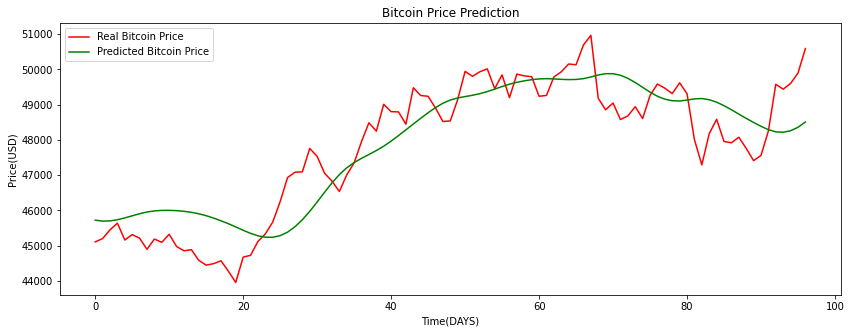

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(Y_Test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_Pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time(DAYS)')
plt.ylabel('Price(USD)')
plt.legend()
plt.show()

#***PICKLE***

In [ ]:
import pickle
import joblib


In [ ]:

# open a file, where you want to store the data
#file = open('btc_model.pkl', 'wb')

# dump information to that file
joblib.dump('wb','btc_model.pkl')

['btc_model.pkl']